In [1]:
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../ETOPO1_Ice_c_gmt4.grd'

fh = Dataset(fileName, mode='r')

fh.variables.keys()

x = fh.variables['x']
y = fh.variables['y']
z = fh.variables['z']

In [3]:
dx = np.diff(x[:])[0]
dy = np.diff(y[:])[0]
print('dx={}, dy={}'.format(dx,dy))

dx=0.01666666666667993, dy=0.01666666666666572


I want the rectangle $ (lon,lat) \in [-240,-120] \times [-60, 60] $, but can only use  $lon \in[-180,180]$, hence have to use the joined set: $$lon \in [120,180] \cup [-180,-120]$$

# Pick a subrectangle centered on the pacific 

i0 = 70*50
i1 = 150*50
j0 = 38*50
j1 = 100*50
print(i0,i1,j0,j1)
print(i1-i0,j1-j0)

In [117]:
i0 = 70*50
i1 = 175*50
j0 = 15*50
j1 = 100*50
print(i0,i1,j0,j1)
print(i1-i0,j1-j0)

3500 8750 750 5000
5250 4250


In [123]:
skip = 5
bathymetry = z[j0:j1:skip,i0:i1:skip]

In [124]:
bathymetry.shape

(850, 1050)

In [125]:
x0 = i0/60 - 180
x1 = i1/60 - 180
y0 = j0/60 - 90
y1 = j1/60 - 90
print('%.2f %.2f %.2f %.2f'%(x0,x1,y0,y1))

-121.67 -34.17 -77.50 -6.67


(0.0, 1050.0, 0.0, 850.0)

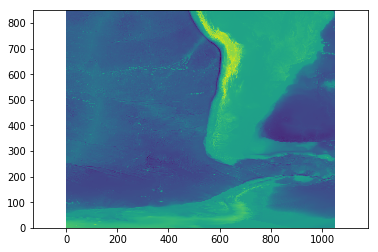

In [126]:
plt.pcolormesh(bathymetry)
plt.axis('equal')

In [127]:
file = 'bathymetry{}min'.format(skip)
# bathymetry.data.astype('float64').tofile('bathymetry_small{}min'.format(skip))
print('bathymetry_small{}min'.format(skip))
np.savetxt('bathymetry_small{}min'.format(skip),-bathymetry)

bathymetry_small5min


# Easywave

In [63]:
def writeGRD(z,name, xll, xur, yll, yur):
    ncols = z.shape[1]
    nrows = z.shape[0]
    f = open(name,'w')
    f.write('DSAA\n')
    f.write('%i %i\n'%(ncols, nrows))
    f.write('%.3f %.3f\n'%(xll,xur))
    f.write('%.3f %.3f\n'%(yll,yur))


    f.write('%.3f %.3f\n'%(z.min(),z.max()))

    s = [' '.join(['%.5f '%num for num in z[-i,:]]) for i in range(z.shape[0])]

    for ss in s:
        f.write('%s\n'%ss)
    f.close()

# writeGRD(np.flipud(z),'bathymetry{}mins.grd'.format(k))

In [132]:
x0+360,x1+360

(238.33333333333334, 325.83333333333337)

In [128]:
writeGRD(np.flipud(bathymetry), 'bathymetryEasywave_small{}min'.format(skip), x0+360,x1+360, y0,y1)